In [1]:
import json
import glob
from PIL import Image
import requests
import numpy as np
from matplotlib import pyplot as plt 


In [2]:
def extract_img_heatmap(json_pth, normalize = False):
    with open(json_pth) as f:
        loaded_json = json.loads(f.readline())
        
    x = loaded_json['loss']
    facts = loaded_json['factors']
    target = loaded_json['target']
    
    if normalize:
        for i, f in enumerate(facts):
            x[i+1] /= 1+sum([1-fi for fi in f])
    
    y = -np.array(x[1:])+x[0]
    y= y.reshape(30,30)
    
    fig,(ax1,ax2) = plt.subplots(1,2)
    
    ax1.set_title(json_pth.split('/')[-3] + " // " + target)
    raw_image = Image.open(loaded_json['img'])
    raw_image.resize((300,300))
    ax1.imshow(raw_image)
    ax1.axis('off')
    
    ax2.imshow(y)
    #ax2.imshow(y>.01)
    ax2.axis('off')
    #ax2.colorbar()

/tmp/ipykernel_454498/2651301307.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,(ax1,ax2) = plt.subplots(1,2)


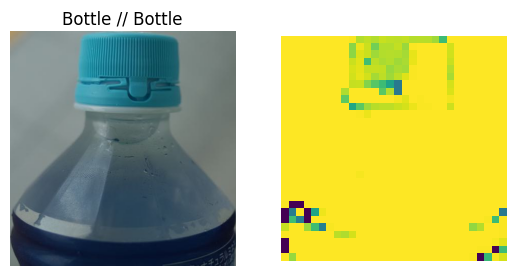

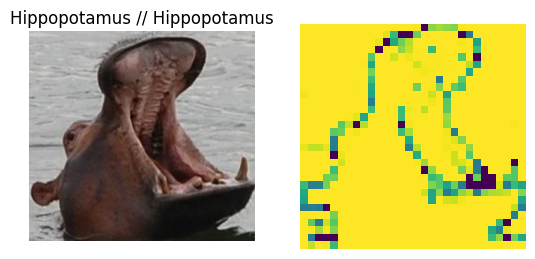

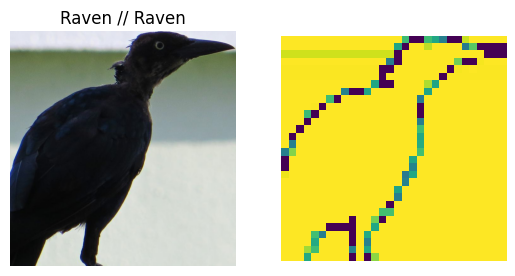

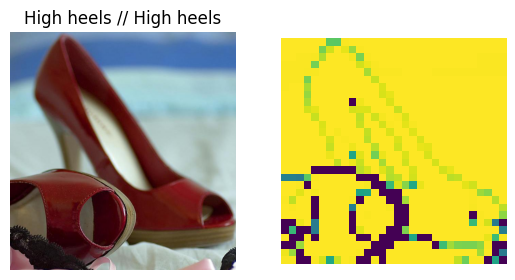

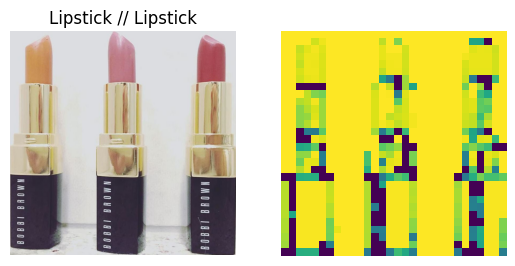

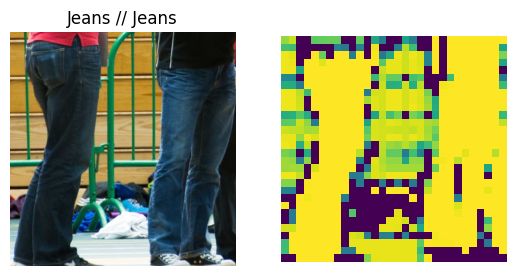

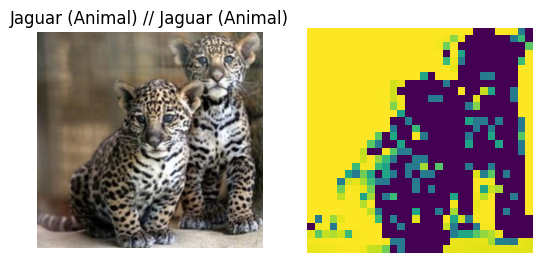

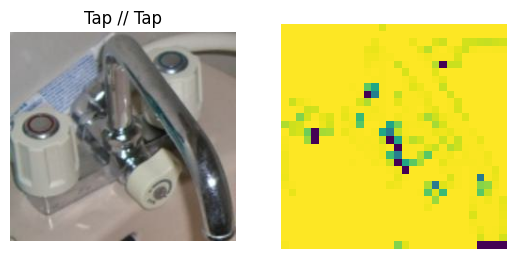

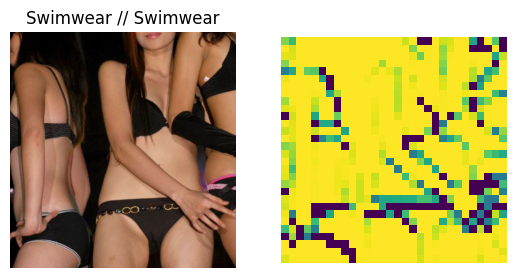

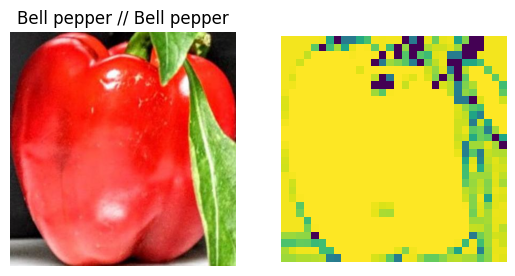

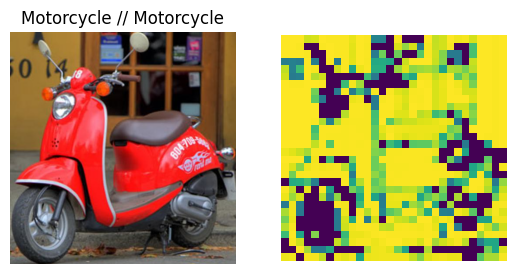

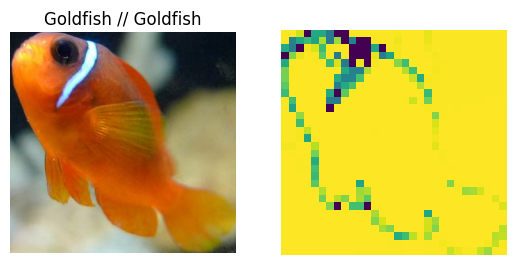

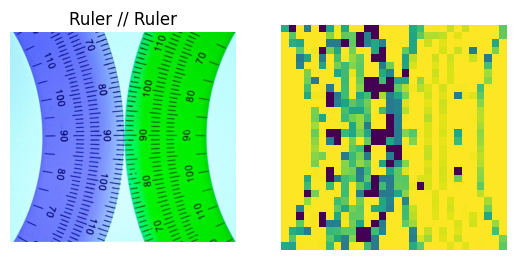

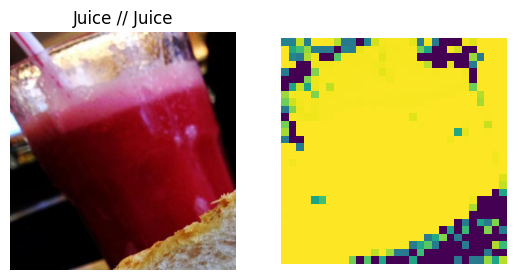

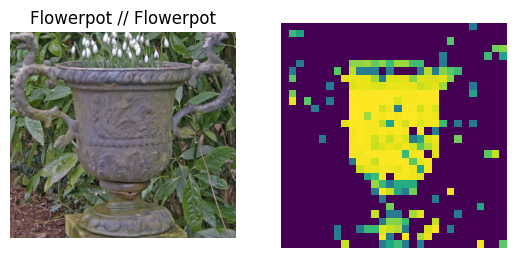

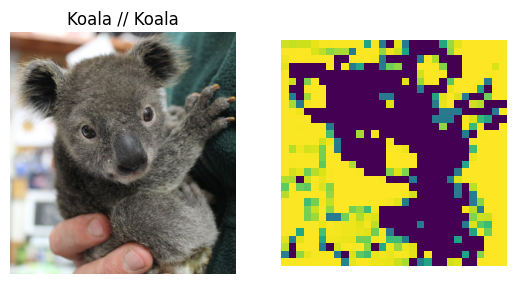

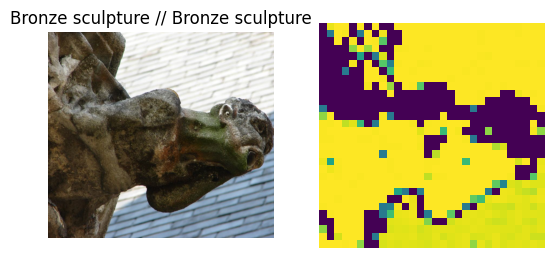

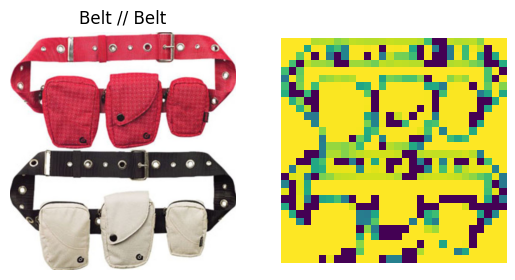

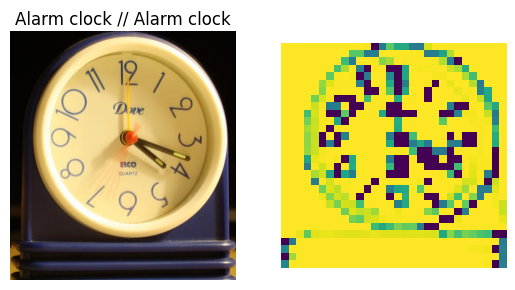

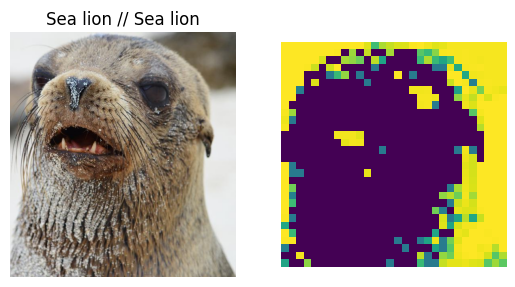

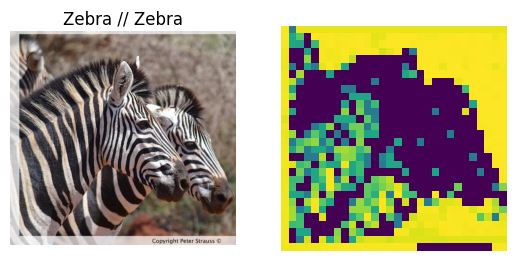

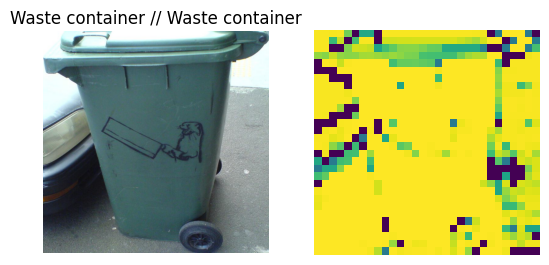

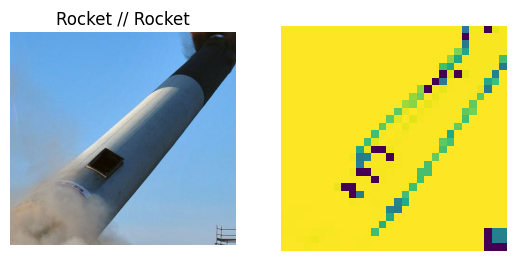

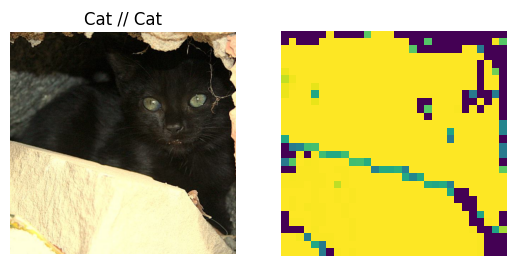

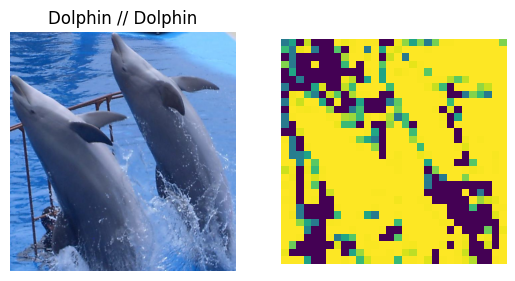

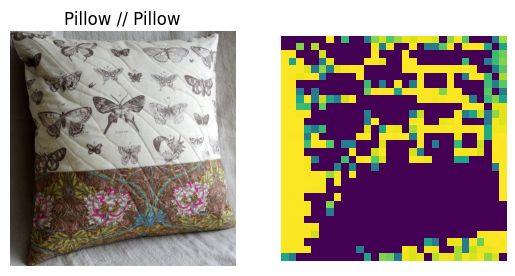

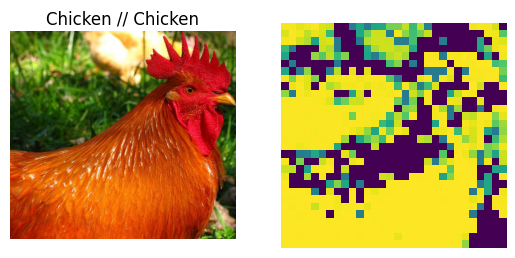

In [3]:
suffix = '7_fix3'
for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/*/images/*_explanation_{suffix}*'):
    extract_img_heatmap(p, True)